In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras import layers
import matplotlib.pyplot as plt
import pandas as pd

2025-07-15 16:39:18.308553: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Tasks

The idea of this tutorial is to make you familiar with the construction of a simple neural network model to fit a function and, in particular, to the `tensorflow` library. The main steps are the following:

1. Choose a function to fit and generate fake data according to it simulating also experimental errors.
2. Visualize the data.
3. Construct a NN model to fit the function and train it to the data.
4. Evaluate the predictions of your model.
5. (Bonus task) Adopt a replica approach: generate different fake data replica and fit a different model to each replica. Then use the envelope of the predictions to get an uncertainty band. 

Some of the notebook's cells have been left with partial code to guide you but you are free to solve the problem in the way you prefer. 

## Function of nature that we would like to discover

Here we define the function we are going to discover along with a gaussian smearing.  

In [2]:
def f_truth(x):
    return (3*x**3 - x**2 + 5*x - 3)

def func_to_fit(x, scale):
    """
    Smears a function with Gaussian noise.
    """
    return np.random.normal(loc = f_truth(x), scale = scale)

Here we generate noisy data based on the function above

In [3]:
x_vals = np.random.rand(200)
y_vals = func_to_fit(x_vals, scale=1.0)

Before we start, visualize the data we are going to fit

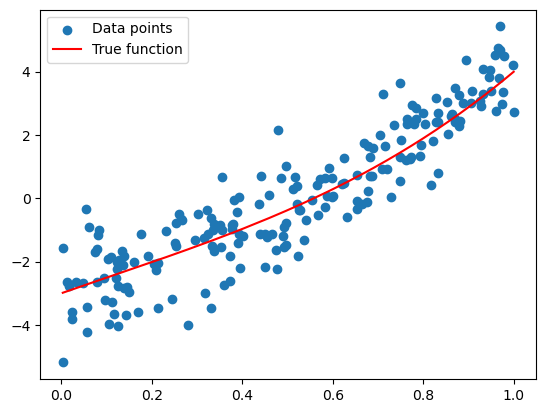

In [4]:
fig, ax = plt.subplots()

ax.scatter(x_vals, y_vals, marker='o', label='Data points')

x_sorted = np.sort(x_vals)

ax.plot(x_sorted, f_truth(x_sorted), color='red', label='True function')

ax.legend()

## Let's now build the model

It is time to build the model. Let's define a function for that. Use the `tensorflow` `Dense` layers and add them to the model with the function `model.add()`. 

In [5]:
input_layer = keras.Input(shape=(1,)) # input layer
model = keras.Sequential([input_layer])
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='relu')) # output layer

In [16]:
model_2 = keras.Sequential([keras.Input(shape=(1,))])
model_2.add(layers.Dense(64, activation='relu'))
model_2.add(layers.Dense(64, activation='relu'))
model_2.add(layers.Dense(1, activation='relu')) # output layer

Now define an appropriate *loss* and an appropriate *optimizer*. Finally compile your model. 

In [17]:
model.compile(optimizer='SGD', loss='mean_squared_error')

In [ ]:
model_2.compile(optimizer='SGD', loss='mean_squared_error')

Look at the summary of your model now

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

## Let's train the model

It is finally time to train the model to the fake data. To do that we just need to call the function `model.fit()`. Look at the `tensorflow` documentation to understand which inputs it needs.

Also make sure to separate the data into a training and a validation set, such that we can do [early stopping](https://en.wikipedia.org/wiki/Early_stopping) to prevent overtraining. For this we can use the [EarlyStopping](https://keras.io/api/callbacks/early_stopping/) callback provided by Keras. 

In [9]:
model_history = model.fit(x_vals,y_vals,
                            epochs=100,
                            batch_size=32,
                            validation_split=0.2,
                            verbose=1
                            )

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 5.0860 - val_loss: 4.9576
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5.5194 - val_loss: 4.8626
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.8340 - val_loss: 4.7682
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.5751 - val_loss: 4.6828
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.0575 - val_loss: 4.6007
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.4817 - val_loss: 4.5224
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.6529 - val_loss: 4.4505
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 4.9711 - val_loss: 4.3790
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.2079 - val_loss: 4.3114
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 4.0174 - val_loss: 4.2474
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 4.3086 - val_loss: 4.1851
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 4.1988 - val_lo

In [19]:
model_2_history = model_2.fit(x_vals,y_vals,
                            epochs=100,
                            batch_size=32,
                            validation_split=0.2,
                            verbose=1
                            )

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 4.9855 - val_loss: 5.1887
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.0289 - val_loss: 5.1887
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.3453 - val_loss: 5.1887
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.3030 - val_loss: 5.1887
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5.6162 - val_loss: 5.1887
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.7196 - val_loss: 5.1887
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.7898 - val_loss: 5.1887
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.8960 - val_loss: 5.1887
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.0152 - val_loss: 5.1887
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.7892 - val_loss: 5.1887
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.0963 - val_loss: 5.1887
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.1162 - val_lo

### Let's look at the training/valdation losses

We can have a look to the loss values as a function of the epoch. 

In [11]:
hist = pd.DataFrame(model_history.history)
hist['epoch'] = model_history.epoch

In [12]:
# hist_2 = pd.DataFrame(model_2_history.history)
# hist_2['epoch'] = model_2_history.epoch

We can also plot both the validation and training losses

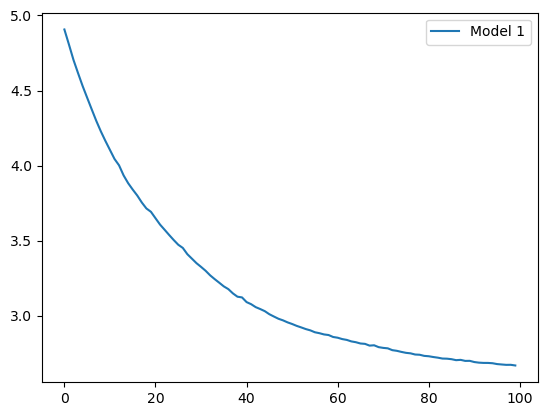

In [13]:
fig, ax = plt.subplots()

ax.plot(hist['epoch'], hist['loss'], label='Model 1')
# ax.plot(hist_2['epoch'], hist_2['loss'], label='Model 2')

ax.legend()

### Now let's look to predictions 

Let's now try to reconstruct the original function asking the model to predict the function over a linear grid in x. To do that you need to use the function `model.predict()`. Then plot your predictions and the original function.

In [14]:
x = tf.linspace(0.0, 1.0, 50) # input grid for the prediction
#...predict here...#

Plot the training and validation data, together with our prediction and real function

In [15]:
#... do the plotting here...#

# (bonus exercise) adopt a replica approach

When we set `scale=1.0` above, this added a level of noise to model the uncertainty present in the data. It is also possible to propagate this uncertainty to our fits. 

One way to do this, is through the "replica approach" in which we do another sampling on top of our noisy data, where this sampling follow the uncertainty in the data (i.e. `scale=1.0`). If we do this $N_\mathrm{replica} \rightarrow \infty$ times end up with a Monte Carlo distribution of datasets, that encode the uncertainty in the data. We can then simply fit $N_\mathrm{replica}$ different models to those $N_\mathrm{replica}$ dataset, to obtain a corresponding Monte Carlo distribution in the space of the fit function. 
